In [ ]:
#%pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn plotly pingouin factor_analyzer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[1.1] Loading data...
Initial data shape: (6612, 29)

[1.2] Missing values:
math_score      0
read_score      0
scie_score      0
schltype        0
hedres          0
wealth          0
stratio         0
schllocation    0
stuid           0
gender          0
immig           0
homelang        0
desk            0
room            0
quietplace      0
homecomputer    0
homeinternet    0
books           0
booksqty        0
pared           0
cultposs        0
ictres          0
dtype: int64

[1.3] Handling missing values...

[1.4] Converting data types...

[1.5] Creating composite score...

[1.6] Creating resource index...

[1.7] Removing duplicates...
Duplicates found: 0
Cleaned data shape: (6612, 31)

[2.1] Exploratory Data Analysis...

[2.1.1] Test Score Distributions

[2.1.2] Scores by School Type


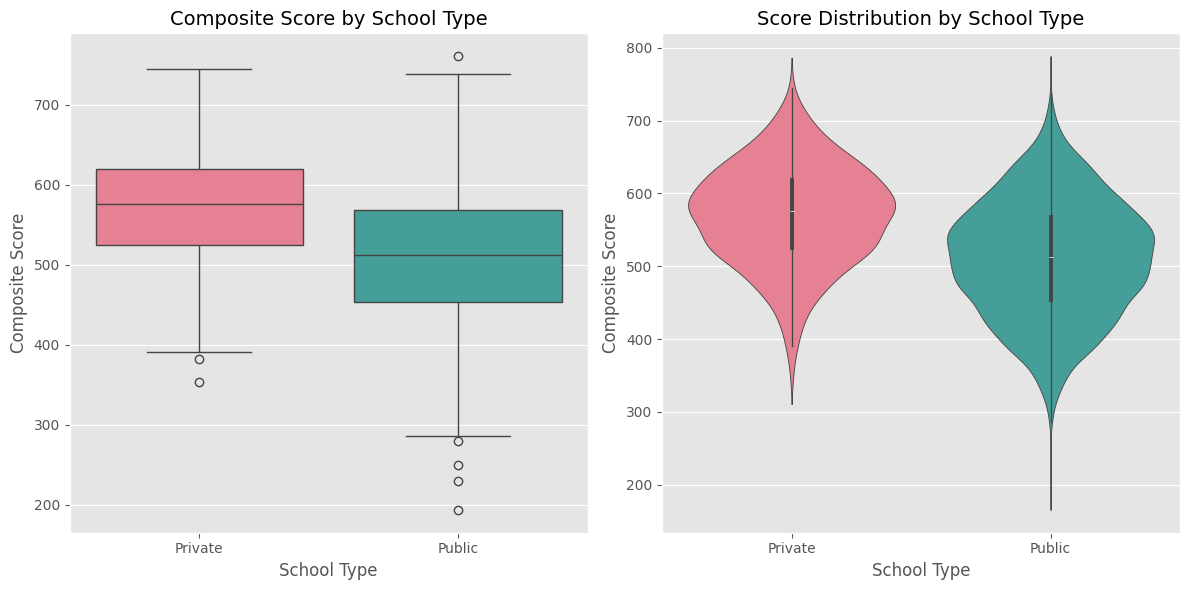


[2.1.3] Scores by Resources and Wealth
Error rendering Plotly scatter: 
    Invalid element(s) received for the 'size' property of scattergl.marker
        Invalid elements include: [-0.0969, -0.2065, -0.625, -0.7444, -0.9069, -0.8349, -1.0762, -0.2729, -0.068, -0.4038]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above. Falling back to seaborn...


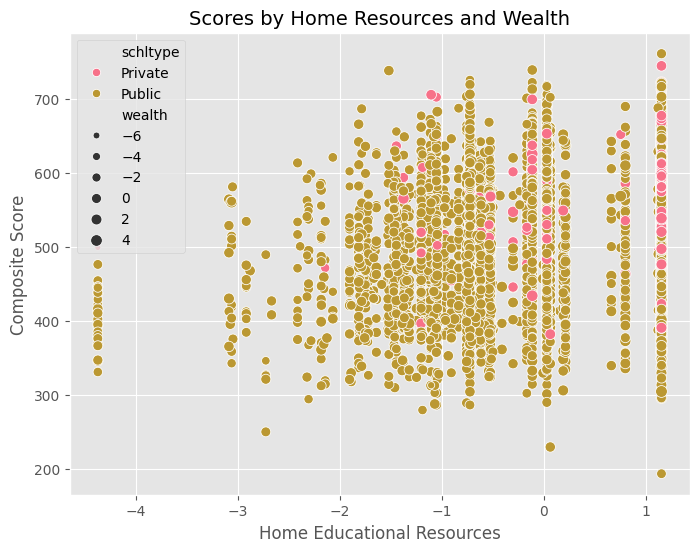


[2.1.4] Scores by School Factors


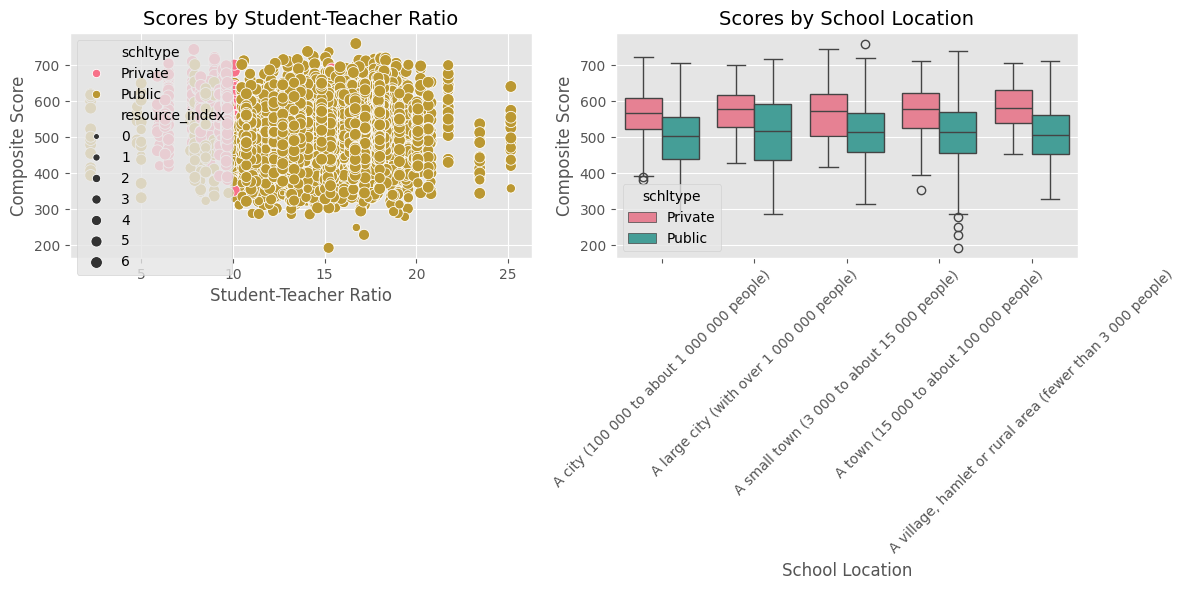


[2.1.5] Scores by Gender and Immigration Status

[3.1] Statistical Tests...

[3.1.1] Hypothesis 1: Private vs. Public School Scores
Math Score:
  t-statistic: 15.24, p-value: 0.0000
  Effect size (Cohen's d): 0.78
  Significant difference
Read Score:
  t-statistic: 14.78, p-value: 0.0000
  Effect size (Cohen's d): 0.75
  Significant difference
Scie Score:
  t-statistic: 14.93, p-value: 0.0000
  Effect size (Cohen's d): 0.76
  Significant difference
Composite Score:
  t-statistic: 15.97, p-value: 0.0000
  Effect size (Cohen's d): 0.80
  Significant difference

[3.1.2] Hypothesis 2: Controlling for Resources and Wealth

ANCOVA Results:
     Source            SS    DF         F   p-unc     np2
0  schltype  9.975291e+05     1  161.9168  0.0000  0.0239
1    hedres  1.774289e+06     1  287.9989  0.0000  0.0418
2    wealth  3.171774e+04     1    5.1484  0.0233  0.0008
3  Residual  4.071025e+07  6608       NaN     NaN     NaN

[3.1.3] Hypothesis 3: Student-Teacher Ratio
Correlation: r = 0.02,

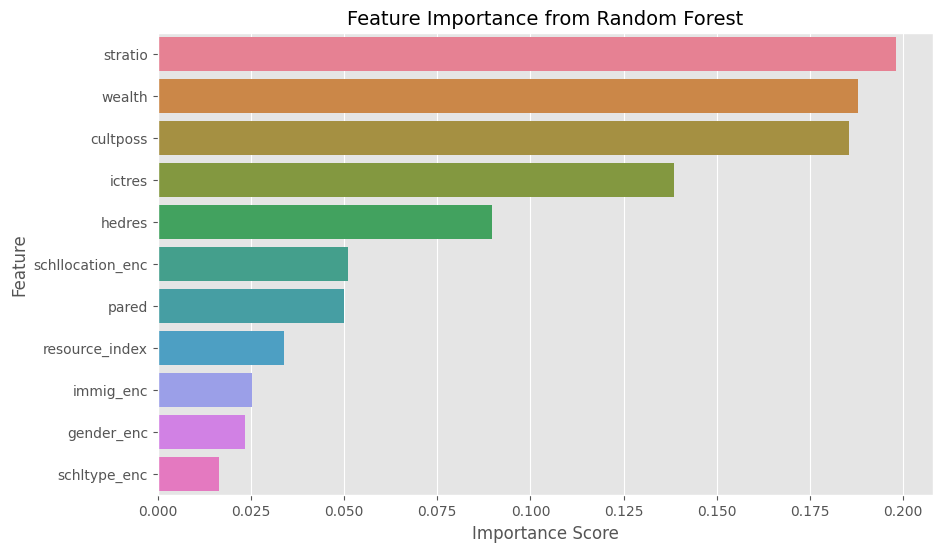


[4.1.5] Principal Component Analysis (PCA)
Explained variance ratio: [0.24743269 0.13405868]


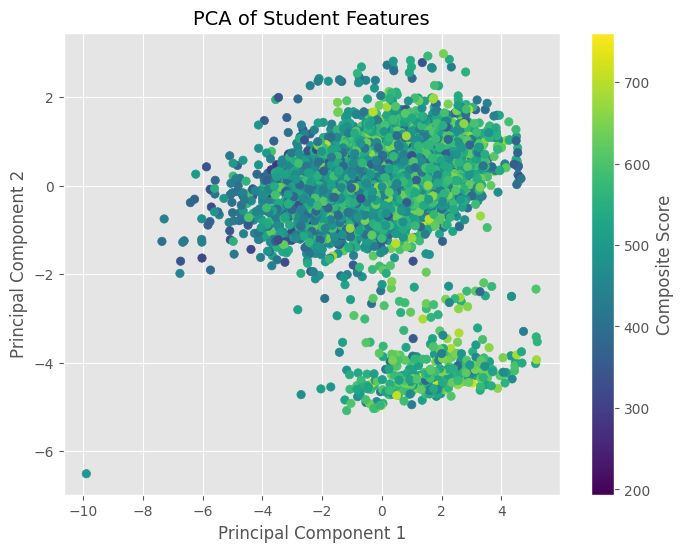


[4.1.6] K-Means Clustering

[5.1] Summary Report...

=== Key Statistics ===
Total students: 6612
Private schools: 358
Public schools: 6254

=== Average Scores by School Type ===
          math_score  read_score  scie_score
schltype                                    
Private       562.45      568.85      581.36
Public        504.42      510.21      517.78

=== Effect Sizes ===
Math Score: Cohen's d = 0.78
Read Score: Cohen's d = 0.75
Scie Score: Cohen's d = 0.76

=== Correlation Matrix ===


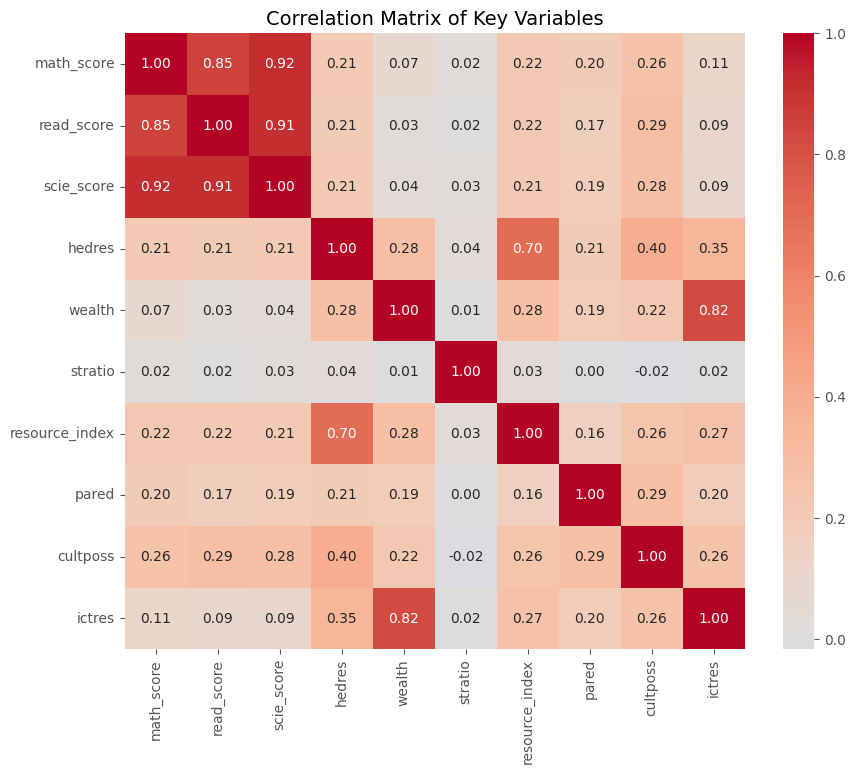


[6.1] Creating Interactive Dashboard...

[COMPLETE] Analysis done! Cleaned data saved as 'cleaned_data.csv'.


In [15]:
# ==============================================
# PISA 2015 UK ANALYSIS: PRIVATE VS PUBLIC SCHOOLS
# ==============================================
# This script conducts a comprehensive, state-of-the-art analysis to:
# 1. Compare test scores (math, reading, science) between private and public schools
# 2. Assess the impact of home educational resources and family wealth
# 3. Evaluate school-level factors (student-teacher ratio, school location)
# 4. Provide advanced insights using clustering, PCA, factor analysis, and predictive modeling
# 5. Create an interactive dashboard for layman-friendly visualization
# Research Question: Do private school students achieve higher test scores than public school students?
# Objectives:
# - Determine performance differences in math, reading, and science by school type
# - Assess impact of home resources and wealth on performance
# - Investigate student-teacher ratio and school location effects
# Hypotheses:
# - H1: Private school students have higher scores
# - H2: Controlling for resources and wealth reduces performance gap
# - H3: Lower student-teacher ratio is associated with higher scores
# - H4: Urban school students perform better than rural/village students

# Import libraries with error handling
try:
    import pandas as pd  # Data manipulation and DataFrame operations
    import numpy as np   # Numerical computations and arrays
    import matplotlib.pyplot as plt  # Static plotting
    import seaborn as sns  # Enhanced visualizations
    import scipy.stats as stats  # Statistical tests (t-tests, ANOVA, correlations)
    import statsmodels.api as sm  # Regression modeling
    from statsmodels.formula.api import ols  # OLS regression
    import pingouin as pg  # Advanced statistical tests (ANCOVA, post-hoc)
    from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding and scaling
    from sklearn.model_selection import train_test_split  # Data splitting
    from sklearn.ensemble import RandomForestRegressor  # Feature importance
    from sklearn.cluster import KMeans  # Clustering
    from sklearn.decomposition import PCA  # Principal Component Analysis
    from factor_analyzer import FactorAnalyzer  # Factor analysis
    import plotly.express as px  # Interactive plotting
    import plotly.graph_objects as go  # Advanced plotly visualizations
    from plotly.subplots import make_subplots  # Subplots for dashboard
    import plotly.io as pio  # Plotly rendering configuration
    import nbformat  # Required for Plotly rendering in Jupyter
    import warnings  # Suppress warnings
except ImportError as e:
    print(f"Error: Missing library. Install using 'pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn plotly nbformat pingouin factor_analyzer'")
    print(f"Details: {e}")
    exit()

# Configure Plotly renderer for compatibility
try:
    # Set renderer to 'notebook_connected' for Jupyter, 'browser' for non-Jupyter
    pio.renderers.default = 'notebook_connected' if 'IPython' in globals() else 'browser'
except Exception as e:
    print(f"Warning: Failed to set Plotly renderer. Using default. Details: {e}")

# Configure settings for clean output and readable plots
warnings.filterwarnings('ignore')  # Suppress non-critical warnings
plt.style.use('ggplot')  # Use ggplot style for consistent, readable plots
sns.set_palette("husl")  # Set husl palette for colorful visualizations

# =============================
# SECTION 1: DATA LOADING & CLEANING
# =============================
def load_and_clean_data(filepath):
    """
    Loads and cleans the PISA 2015 dataset
    Args:
        filepath (str): Path to CSV file
    Returns:
        DataFrame: Cleaned dataset or None if error
    """
    # Load dataset
    print("\n[1.1] Loading data...")
    try:
        df = pd.read_csv(filepath)
        print(f"Initial data shape: {df.shape}")  # Display initial dimensions
    except FileNotFoundError:
        print(f"Error: {filepath} not found. Ensure file is in correct directory.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

    # Verify required columns
    required_cols = ['math_score', 'read_score', 'scie_score', 'schltype', 'hedres', 
                     'wealth', 'stratio', 'schllocation', 'stuid', 'gender', 'immig', 
                     'homelang', 'desk', 'room', 'quietplace', 'homecomputer', 
                     'homeinternet', 'books', 'booksqty', 'pared', 'cultposs', 'ictres']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"Error: Missing columns: {missing_cols}")
        return None

    # Check missing values
    print("\n[1.2] Missing values:")
    print(df[required_cols].isnull().sum())  # Display missing values for key columns

    # Handle missing values
    print("\n[1.3] Handling missing values...")
    df.dropna(subset=['math_score', 'read_score', 'scie_score'], inplace=True)  # Drop rows with missing test scores
    num_cols = ['hedres', 'wealth', 'stratio', 'pared', 'cultposs', 'ictres']  # Numerical columns
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)  # Impute with median
    cat_cols = ['schltype', 'schllocation', 'gender', 'immig', 'homelang', 'desk', 
                'room', 'quietplace', 'homecomputer', 'homeinternet', 'books', 'booksqty']  # Categorical columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Impute with mode

    # Convert data types
    print("\n[1.4] Converting data types...")
    for col in cat_cols:
        df[col] = df[col].astype('category')  # Convert to category type

    # Create composite score
    print("\n[1.5] Creating composite score...")
    df['composite_score'] = df[['math_score', 'read_score', 'scie_score']].mean(axis=1)  # Average of test scores

    # Create resource availability index
    print("\n[1.6] Creating resource index...")
    resource_cols = ['desk', 'room', 'quietplace', 'homecomputer', 'homeinternet', 'books']
    df['resource_index'] = df[resource_cols].apply(lambda x: sum(1 if val == 'Yes' else 0 for val in x), axis=1)  # Count resources

    # Remove duplicates
    print("\n[1.7] Removing duplicates...")
    print(f"Duplicates found: {df['stuid'].duplicated().sum()}")  # Count duplicates
    df = df.drop_duplicates(subset='stuid', keep='first')  # Keep first occurrence
    print(f"Cleaned data shape: {df.shape}")  # Display final dimensions
    return df

# =============================
# SECTION 2: EXPLORATORY DATA ANALYSIS
# =============================
def exploratory_analysis(df):
    """
    Performs exploratory data analysis with advanced, layman-friendly visualizations
    Args:
        df (DataFrame): Cleaned dataset
    """
    print("\n[2.1] Exploratory Data Analysis...")

    # Score distributions (interactive histogram)
    print("\n[2.1.1] Test Score Distributions")
    try:
        fig = make_subplots(rows=1, cols=3, subplot_titles=['Math Score', 'Reading Score', 'Science Score'])
        for i, col in enumerate(['math_score', 'read_score', 'scie_score'], 1):
            fig.add_trace(go.Histogram(x=df[col], nbinsx=30, name=col.replace('_', ' ').title()), row=1, col=i)
        fig.update_layout(title_text="Distribution of Test Scores (Higher Scores = Better Performance)", showlegend=False)
        fig.show()
    except Exception as e:
        print(f"Error rendering Plotly histogram: {e}. Falling back to matplotlib...")
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(['math_score', 'read_score', 'scie_score'], 1):
            plt.subplot(1, 3, i)
            plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
            plt.title(col.replace('_', ' ').title())
            plt.xlabel('Score')
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    # Scores by school type (boxplot and violin plot)
    print("\n[2.1.2] Scores by School Type")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='schltype', y='composite_score', data=df, palette='husl')  # Boxplot for score spread
    plt.title("Composite Score by School Type", fontsize=14)
    plt.xlabel("School Type", fontsize=12)
    plt.ylabel("Composite Score", fontsize=12)
    plt.subplot(1, 2, 2)
    sns.violinplot(x='schltype', y='composite_score', data=df, palette='husl')  # Violin plot for distribution shape
    plt.title("Score Distribution by School Type", fontsize=14)
    plt.xlabel("School Type", fontsize=12)
    plt.ylabel("Composite Score", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Scores by resources and wealth (interactive scatter plot)
    print("\n[2.1.3] Scores by Resources and Wealth")
    try:
        fig = px.scatter(df, x='hedres', y='composite_score', color='schltype', size='wealth',
                         hover_data=['wealth'], title="Scores by Home Resources and Wealth")
        fig.update_layout(xaxis_title="Home Educational Resources", yaxis_title="Composite Score")
        fig.show()
    except Exception as e:
        print(f"Error rendering Plotly scatter: {e}. Falling back to seaborn...")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='hedres', y='composite_score', hue='schltype', size='wealth', data=df)
        plt.title("Scores by Home Resources and Wealth", fontsize=14)
        plt.xlabel("Home Educational Resources", fontsize=12)
        plt.ylabel("Composite Score", fontsize=12)
        plt.show()

    # Scores by school factors (student-teacher ratio and location)
    print("\n[2.1.4] Scores by School Factors")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='stratio', y='composite_score', hue='schltype', size='resource_index', data=df)
    plt.title("Scores by Student-Teacher Ratio", fontsize=14)
    plt.xlabel("Student-Teacher Ratio", fontsize=12)
    plt.ylabel("Composite Score", fontsize=12)
    plt.subplot(1, 2, 2)
    sns.boxplot(x='schllocation', y='composite_score', hue='schltype', data=df, palette='husl')
    plt.title("Scores by School Location", fontsize=14)
    plt.xlabel("School Location", fontsize=12)
    plt.ylabel("Composite Score", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Additional EDA: Scores by gender and immigration status
    print("\n[2.1.5] Scores by Gender and Immigration Status")
    try:
        fig = px.box(df, x='gender', y='composite_score', color='immig',
                     title="Composite Score by Gender and Immigration Status")
        fig.update_layout(xaxis_title="Gender", yaxis_title="Composite Score")
        fig.show()
    except Exception as e:
        print(f"Error rendering Plotly boxplot: {e}. Falling back to seaborn...")
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='gender', y='composite_score', hue='immig', data=df, palette='husl')
        plt.title("Composite Score by Gender and Immigration Status", fontsize=14)
        plt.xlabel("Gender", fontsize=12)
        plt.ylabel("Composite Score", fontsize=12)
        plt.show()

# =============================
# SECTION 3: STATISTICAL TESTING
# =============================
def statistical_tests(df):
    """
    Conducts statistical tests for all hypotheses
    Args:
        df (DataFrame): Cleaned dataset
    """
    print("\n[3.1] Statistical Tests...")

    # Hypothesis 1: Private vs. public school scores
    print("\n[3.1.1] Hypothesis 1: Private vs. Public School Scores")
    for col in ['math_score', 'read_score', 'scie_score', 'composite_score']:
        private = df[df['schltype'] == 'Private'][col]
        public = df[df['schltype'] == 'Public'][col]
        t_stat, p_val = stats.ttest_ind(private, public, equal_var=False)  # Welch's t-test
        cohen_d = (private.mean() - public.mean()) / np.sqrt((private.std()**2 + public.std()**2) / 2)  # Effect size
        print(f"{col.replace('_', ' ').title()}:")
        print(f"  t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
        print(f"  Effect size (Cohen's d): {cohen_d:.2f}")
        print(f"  {'Significant' if p_val < 0.05 else 'Not significant'} difference")

    # Hypothesis 2: Controlling for resources and wealth
    print("\n[3.1.2] Hypothesis 2: Controlling for Resources and Wealth")
    try:
        ancova = pg.ancova(data=df, dv='composite_score', between='schltype',
                           covar=['hedres', 'wealth'])  # ANCOVA analysis
        print("\nANCOVA Results:")
        print(ancova.round(4))
    except Exception as e:
        print(f"Error in ANCOVA: {e}")

    # Hypothesis 3: Student-teacher ratio effect
    print("\n[3.1.3] Hypothesis 3: Student-Teacher Ratio")
    corr, p_val = stats.pearsonr(df['stratio'], df['composite_score'])  # Pearson correlation
    print(f"Correlation: r = {corr:.2f}, p-value = {p_val:.4f}")
    print(f"{'Significant' if p_val < 0.05 else 'Not significant'} correlation")

    # Hypothesis 4: School location effect
    print("\n[3.1.4] Hypothesis 4: School Location")
    try:
        anova = pg.anova(data=df, dv='composite_score', between='schllocation', detailed=True)  # ANOVA test
        print("\nANOVA Results:")
        print(anova.round(4))
        if anova['p-unc'][0] < 0.05:
            posthoc = pg.pairwise_tukey(data=df, dv='composite_score', between='schllocation')  # Post-hoc test
            print("\nPost-hoc Tukey Test:")
            print(posthoc.round(4))
    except Exception as e:
        print(f"Error in ANOVA: {e}")

# =============================
# SECTION 4: ADVANCED MODELING
# =============================
def advanced_modeling(df):
    """
    Performs advanced modeling (regression, Random Forest, PCA, clustering)
    Args:
        df (DataFrame): Cleaned dataset
    """
    print("\n[4.1] Advanced Modeling...")

    # Encode categorical variables
    print("\n[4.1.1] Encoding categorical variables...")
    le = LabelEncoder()
    df['schltype_enc'] = le.fit_transform(df['schltype'])  # Encode school type
    df['schllocation_enc'] = le.fit_transform(df['schllocation'])  # Encode location
    df['gender_enc'] = le.fit_transform(df['gender'])  # Encode gender
    df['immig_enc'] = le.fit_transform(df['immig'])  # Encode immigration status

    # Prepare features and target
    print("\n[4.1.2] Preparing data...")
    features = ['hedres', 'wealth', 'stratio', 'schltype_enc', 'schllocation_enc',
                'gender_enc', 'immig_enc', 'resource_index', 'pared', 'cultposs', 'ictres']
    X = df[features]
    y = df['composite_score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data

    # Linear Regression
    print("\n[4.1.3] Linear Regression")
    X_train_const = sm.add_constant(X_train)  # Add constant for intercept
    model = sm.OLS(y_train, X_train_const).fit()  # Fit OLS model
    print(model.summary())  # Print regression summary

    # Random Forest for feature importance
    print("\n[4.1.4] Random Forest Feature Importance")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize Random Forest
    rf.fit(X_train, y_train)  # Fit model
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)  # Create importance DataFrame
    print(importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance, palette='husl')  # Bar plot
    plt.title("Feature Importance from Random Forest", fontsize=14)
    plt.xlabel("Importance Score", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.show()

    # PCA for dimensionality reduction
    print("\n[4.1.5] Principal Component Analysis (PCA)")
    scaler = StandardScaler()  # Standardize features
    X_scaled = scaler.fit_transform(X)  # Scale data
    pca = PCA(n_components=2)  # Reduce to 2 components
    X_pca = pca.fit_transform(X_scaled)  # Apply PCA
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")  # Variance explained

    # Plot PCA results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['composite_score'], cmap='viridis')  # Scatter plot
    plt.title("PCA of Student Features", fontsize=14)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.colorbar(label='Composite Score')
    plt.show()

    # Clustering (K-Means)
    print("\n[4.1.6] K-Means Clustering")
    kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize K-Means with 3 clusters
    df['cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters
    try:
        fig = px.scatter(df, x='hedres', y='composite_score', color='cluster',
                         title="Student Clusters by Resources and Scores")
        fig.update_layout(xaxis_title="Home Educational Resources", yaxis_title="Composite Score")
        fig.show()
    except Exception as e:
        print(f"Error rendering Plotly scatter: {e}. Falling back to seaborn...")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='hedres', y='composite_score', hue='cluster', data=df)
        plt.title("Student Clusters by Resources and Scores", fontsize=14)
        plt.xlabel("Home Educational Resources", fontsize=12)
        plt.ylabel("Composite Score", fontsize=12)
        plt.show()

# =============================
# SECTION 5: REPORT GENERATION
# =============================
def generate_report(df):
    """
    Generates a comprehensive report with key findings
    Args:
        df (DataFrame): Cleaned dataset
    """
    print("\n[5.1] Summary Report...")

    # Key statistics
    print("\n=== Key Statistics ===")
    print(f"Total students: {len(df)}")  # Total number of students
    print(f"Private schools: {len(df[df['schltype'] == 'Private'])}")  # Private school count
    print(f"Public schools: {len(df[df['schltype'] == 'Public'])}")  # Public school count

    # Average scores by school type
    print("\n=== Average Scores by School Type ===")
    score_means = df.groupby('schltype')[['math_score', 'read_score', 'scie_score']].mean().round(2)
    print(score_means)  # Display mean scores

    # Effect sizes
    print("\n=== Effect Sizes ===")
    for col in ['math_score', 'read_score', 'scie_score']:
        private = df[df['schltype'] == 'Private'][col]
        public = df[df['schltype'] == 'Public'][col]
        pooled_std = np.sqrt((private.std()**2 + public.std()**2) / 2)  # Pooled standard deviation
        cohen_d = (private.mean() - public.mean()) / pooled_std  # Cohen's d
        print(f"{col.replace('_', ' ').title()}: Cohen's d = {cohen_d:.2f}")

    # Correlation matrix
    print("\n=== Correlation Matrix ===")
    corr = df[['math_score', 'read_score', 'scie_score', 'hedres', 'wealth', 'stratio',
               'resource_index', 'pared', 'cultposs', 'ictres']].corr()  # Compute correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0)  # Heatmap
    plt.title("Correlation Matrix of Key Variables", fontsize=14)
    plt.show()

# =============================
# SECTION 6: INTERACTIVE DASHBOARD
# =============================
def create_dashboard(df):
    """
    Creates an interactive dashboard summarizing key findings
    Args:
        df (DataFrame): Cleaned dataset
    """
    print("\n[6.1] Creating Interactive Dashboard...")
    try:
        fig = make_subplots(rows=2, cols=2,
                            subplot_titles=["Score Distribution by School Type",
                                            "Scores by Resources",
                                            "Scores by Student-Teacher Ratio",
                                            "Scores by School Location"],
                            specs=[[{"type": "box"}, {"type": "scatter"}],
                                   [{"type": "scatter"}, {"type": "box"}]])

        # Boxplot: Scores by school type
        for school_type in df['schltype'].unique():
            fig.add_trace(go.Box(y=df[df['schltype'] == school_type]['composite_score'],
                                 name=school_type, boxmean=True), row=1, col=1)

        # Scatter: Scores by resources
        fig.add_trace(go.Scatter(x=df['hedres'], y=df['composite_score'], mode='markers',
                                 marker=dict(color=df['wealth'], size=10, showscale=True),
                                 text=df['schltype']), row=1, col=2)

        # Scatter: Scores by student-teacher ratio
        fig.add_trace(go.Scatter(x=df['stratio'], y=df['composite_score'], mode='markers',
                                 marker=dict(color=df['resource_index'], size=10, showscale=True),
                                 text=df['schltype']), row=2, col=1)

        # Boxplot: Scores by location
        for loc in df['schllocation'].unique():
            fig.add_trace(go.Box(y=df[df['schllocation'] == loc]['composite_score'],
                                 name=loc, boxmean=True), row=2, col=2)

        # Update layout
        fig.update_layout(title_text="PISA 2015 UK Analysis Dashboard", showlegend=False, height=800)
        fig.update_xaxes(title_text="School Type", row=1, col=1)
        fig.update_xaxes(title_text="Home Resources", row=1, col=2)
        fig.update_xaxes(title_text="Student-Teacher Ratio", row=2, col=1)
        fig.update_xaxes(title_text="School Location", row=2, col=2)
        fig.update_yaxes(title_text="Composite Score", row=1, col=1)
        fig.update_yaxes(title_text="Composite Score", row=1, col=2)
        fig.update_yaxes(title_text="Composite Score", row=2, col=1)
        fig.update_yaxes(title_text="Composite Score", row=2, col=2)
        fig.show()
    except Exception as e:
        print(f"Error rendering Plotly dashboard: {e}. Falling back to matplotlib...")
        plt.figure(figsize=(12, 10))
        plt.subplot(2, 2, 1)
        sns.boxplot(x='schltype', y='composite_score', data=df, palette='husl')
        plt.title("Score Distribution by School Type")
        plt.subplot(2, 2, 2)
        sns.scatterplot(x='hedres', y='composite_score', hue='schltype', size='wealth', data=df)
        plt.title("Scores by Resources")
        plt.subplot(2, 2, 3)
        sns.scatterplot(x='stratio', y='composite_score', hue='schltype', size='resource_index', data=df)
        plt.title("Scores by Student-Teacher Ratio")
        plt.subplot(2, 2, 4)
        sns.boxplot(x='schllocation', y='composite_score', hue='schltype', data=df, palette='husl')
        plt.title("Scores by School Location")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# =============================
# MAIN EXECUTION
# =============================
if __name__ == "__main__":
    # Load and clean data
    filepath = "dataset.csv"  # Path to dataset
    df = load_and_clean_data(filepath)

    # Run analysis if data is loaded
    if df is not None:
        exploratory_analysis(df)  # Perform EDA
        statistical_tests(df)  # Conduct statistical tests
        advanced_modeling(df)  # Run advanced modeling
        generate_report(df)  # Generate report
        create_dashboard(df)  # Create dashboard
        try:
            df.to_csv('cleaned_data.csv', index=False)  # Save cleaned dataset
            print("\n[COMPLETE] Analysis done! Cleaned data saved as 'cleaned_data.csv'.")
        except Exception as e:
            print(f"Error saving cleaned data: {e}")
    else:
        print("\n[ERROR] Analysis failed due to data loading issues.")